In [39]:
# Imports
import os
import h5py
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from IPython import display

# Global variables
train_dir = 'svhn_large_data/train'
test_dir = 'svhn_large_data/test'
extra_dir = 'svhn_large_data/extra'

In [2]:
# Extract image metadata
def extract_metadata(dr):
    metadata = {}
    fl = h5py.File(dr + '/digitStruct.mat')
    
    for i in xrange(len([x for x in os.listdir(dr) if x.split('.')[1] == 'png'])):        
        name = fl['digitStruct']['name'][i][0]
        bbox = fl['digitStruct']['bbox'][i][0]
        image_metadata = []
    
        if len(fl[bbox]['label']) == 1:    
            digit_metadata = {}
            digit_metadata['height'] = fl[bbox]['height'][0][0]
            digit_metadata['width'] = fl[bbox]['width'][0][0]
            digit_metadata['top'] = fl[bbox]['top'][0][0]
            digit_metadata['left'] = fl[bbox]['left'][0][0]
            digit_metadata['label'] = fl[bbox]['label'][0][0]
            image_metadata.append(digit_metadata)                    
        else:
            for j in xrange(len(fl[bbox]['label'])):
                digit_metadata = {}
                digit_metadata['height'] = [x for x in fl[fl[bbox]['height'][j][0]]][0][0]
                digit_metadata['width'] = [x for x in fl[fl[bbox]['width'][j][0]]][0][0]
                digit_metadata['top'] = [x for x in fl[fl[bbox]['top'][j][0]]][0][0]
                digit_metadata['left'] = [x for x in fl[fl[bbox]['left'][j][0]]][0][0]
                digit_metadata['label'] = [x for x in fl[fl[bbox]['label'][j][0]]][0][0]
                image_metadata.append(digit_metadata)                    
        
        metadata[''.join(chr(c) for c in fl[name][:])] = image_metadata
    
    return metadata

train_metadata = extract_metadata(train_dir)
test_metadata = extract_metadata(test_dir)
# extra_metadata = extract_metadata(extra_dir)


1.png digit 0: height = 219.0 wigth = 81.0 top = 77.0 left = 246.0 label = 1.0
1.png digit 1: height = 219.0 wigth = 96.0 top = 81.0 left = 323.0 label = 9.0


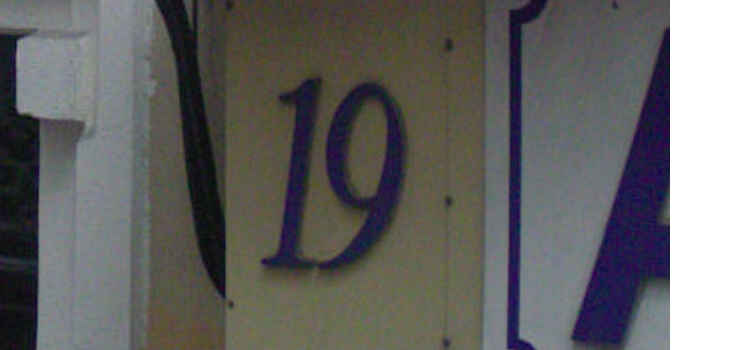


2.png digit 0: height = 32.0 wigth = 23.0 top = 29.0 left = 77.0 label = 2.0
2.png digit 1: height = 32.0 wigth = 26.0 top = 25.0 left = 98.0 label = 3.0


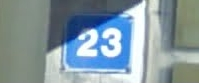


3.png digit 0: height = 15.0 wigth = 8.0 top = 5.0 left = 17.0 label = 2.0
3.png digit 1: height = 15.0 wigth = 9.0 top = 5.0 left = 25.0 label = 5.0



4.png digit 0: height = 34.0 wigth = 15.0 top = 13.0 left = 57.0 label = 9.0
4.png digit 1: height = 34.0 wigth = 13.0 top = 13.0 left = 72.0 label = 3.0


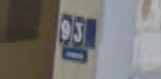


5.png digit 0: height = 46.0 wigth = 21.0 top = 7.0 left = 52.0 label = 3.0
5.png digit 1: height = 46.0 wigth = 15.0 top = 10.0 left = 74.0 label = 1.0


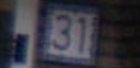

In [103]:
# Lets look at a few images
for i in xrange(1, 6):
    s = '\n'
    for j in xrange(len(train_metadata[str(i) + '.png'])):
        s += str(i) + '.png digit ' + str(j) + ':'
        s += ' height = ' + str(train_metadata[str(i) + '.png'][j]['height'])
        s += ' wigth = ' + str(train_metadata[str(i) + '.png'][j]['width'])
        s += ' top = ' + str(train_metadata[str(i) + '.png'][j]['top'])
        s += ' left = ' + str(train_metadata[str(i) + '.png'][j]['left'])
        s += ' label = ' + str(train_metadata[str(i) + '.png'][j]['label'])
        s += '\n' if j != len(train_metadata[str(i) + '.png']) - 1 else ''
    print s
    display.display(display.Image(train_dir + '/' + str(i) + '.png'))

In [70]:
# Convert images to grayscale, resize, and convert to numpy ndarrays
img_size = 128
train_num = 25000

train_X = np.ndarray((train_num, img_size, img_size)).astype(np.float32)
valid_X = np.ndarray((len(train_metadata) - train_num, img_size, img_size)).astype(np.float32)
test_X = np.ndarray((len(test_metadata), img_size, img_size))

for i in xrange(1, len(train_X) + 1):
    train_X[i - 1,:,:] = Image.open(train_dir + '/' + str(i) + '.png').convert('L').resize((img_size, img_size), Image.ANTIALIAS)

for i in xrange(len(valid_X)):
    valid_X[i,:,:] = Image.open(train_dir + '/' + str(i + len(train_X) + 1) + '.png').convert('L').resize((img_size, img_size), Image.ANTIALIAS)

for i in xrange(1, len(test_X) + 1):
    test_X[i - 1,:,:] = Image.open(test_dir + '/' + str(i) + '.png').convert('L').resize((img_size, img_size), Image.ANTIALIAS)


1.png digit 0: height = 219.0 wigth = 81.0 top = 77.0 left = 246.0 label = 1.0
1.png digit 1: height = 219.0 wigth = 96.0 top = 81.0 left = 323.0 label = 9.0

2.png digit 0: height = 32.0 wigth = 23.0 top = 29.0 left = 77.0 label = 2.0
2.png digit 1: height = 32.0 wigth = 26.0 top = 25.0 left = 98.0 label = 3.0

3.png digit 0: height = 15.0 wigth = 8.0 top = 5.0 left = 17.0 label = 2.0
3.png digit 1: height = 15.0 wigth = 9.0 top = 5.0 left = 25.0 label = 5.0

4.png digit 0: height = 34.0 wigth = 15.0 top = 13.0 left = 57.0 label = 9.0
4.png digit 1: height = 34.0 wigth = 13.0 top = 13.0 left = 72.0 label = 3.0

5.png digit 0: height = 46.0 wigth = 21.0 top = 7.0 left = 52.0 label = 3.0
5.png digit 1: height = 46.0 wigth = 15.0 top = 10.0 left = 74.0 label = 1.0


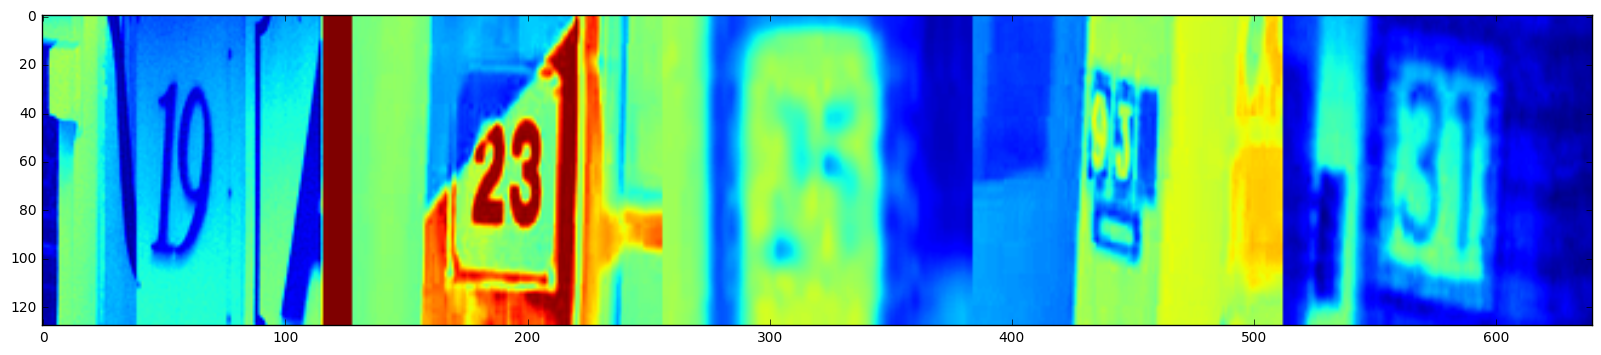

In [101]:
for i in xrange(1, 6):
    s = '\n'
    for j in xrange(len(train_metadata[str(i) + '.png'])):
        s += str(i) + '.png digit ' + str(j) + ':'
        s += ' height = ' + str(train_metadata[str(i) + '.png'][j]['height'])
        s += ' wigth = ' + str(train_metadata[str(i) + '.png'][j]['width'])
        s += ' top = ' + str(train_metadata[str(i) + '.png'][j]['top'])
        s += ' left = ' + str(train_metadata[str(i) + '.png'][j]['left'])
        s += ' label = ' + str(train_metadata[str(i) + '.png'][j]['label'])
        s += '\n' if j != len(train_metadata[str(i) + '.png']) - 1 else ''
    print s

zero = train_X[0,:,:]
one = train_X[1,:,:]
two = train_X[2,:,:]
three = train_X[3,:,:]
four = train_X[4,:,:]
total = np.concatenate((zero, one, two, three, four), axis=1)

%matplotlib inline  
plt.figure(figsize=(20,10))
plt.imshow(total)
plt.show()